**Exercise 4.2:** NetworkX provides a function called ```powerlaw_cluster_graph``` that implements the "Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering." Use it to generate a graph that has the same number of nodes as the Facebook dataset, the same average degree, and the same clustering coefficient. How does the degree distribution in the model compare to the actual distribution?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facebook_combined.txt.gz to facebook_combined.txt.gz


The file imported can be downloaded from here: https://snap.stanford.edu/data/egonets-Facebook.html

In [ ]:
!pip install thinkx

     |████████████████████████████████| 51kB 5.5MB/s 
  Created wheel for thinkx: filename=thinkx-1.1.3-cp36-none-any.whl size=59943 sha256=ec934b6a1d1130565ed7549006e89bde193f9d38231d6333caff53cb7a493b8a
  Stored in directory: /root/.cache/pip/wheels/74/e9/57/f4ad676ba30144b574a6cc36606e82874f8aac8271112f1cd3
Successfully built thinkx


In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=d2afff957a870151e112bc9b8a25fbd745286d687645c8c0ffd6e3df5abc5842
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import random
from networkx.algorithms.approximation import average_clustering
from empiricaldist import Cdf, Pmf


The following definitions are for the decorate function. I cannot install utils and decor so I had to search for the definition manually. It is given below.

In [ ]:
def underride(d, **options):
    for key, val in options.items():
        d.setdefault(key, val)

    return d

def legend(**options):
    underride(options, loc="best", frameon=False)

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, **options)

def decorate(**options):
    loc = options.pop("loc", "best")
    if options.pop("legend", True):
        legend(loc=loc)

    plt.gca().set(**options)
    plt.tight_layout()

options = dict(ls='', marker='.')

The following prerequisite codes for this exercise are extracted from the book.

In [ ]:
def sample_path_lengths(G, nodes=None, trials=1000):
  if nodes is None:
    nodes = list(G) 
  else:
    nodes = list(nodes) #this if else line simply assigns what will we be sampling;
    #either the entire graph G or the nodes provided.

  pairs = np.random.choice(nodes, (trials,2)) #random nodes assigned with a row for each trial and two columns
  lengths = [nx.shortest_path_length(G, *pair)
             for pair in pairs]
  return lengths

def estimate_path_length(G, nodes=None, trials=1000):
  return np.mean(sample_path_lengths(G, nodes, trials)) #this is pretty straighforward

In [ ]:
def degrees(G):
  return [G.degree(u) for u in G]

In [ ]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [ ]:
def barabasi_albert_graph(n, k):
  G = nx.empty_graph(k)
  targets = list(range(k))
  repeated_nodes = []

  for source in range(k, n):
    G.add_edges_from(zip([source]*k, targets))
    
    repeated_nodes.extend(targets)
    repeated_nodes.extend([source] * k)
    
    targets = _random_subset(repeated_nodes, k)
    
  return G

def _random_subset(repeated_nodes, k):
  targets = set()
  while len(targets) < k:
    x = random.choice(repeated_nodes)
    targets.add(x)
  return targets

In [ ]:
fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
k = int(round(m / n))
n, m, k

(4039, 88234, 22)

In [ ]:
test = nx.powerlaw_cluster_graph(n, k, 1) #The nx.powerlaw_cluster_graph(n, k, p) has 3 parameters: # of nodes, # of random edges to add, probability of adding a triangle after adding a random edge
ba = barabasi_albert_graph(n, k) 

In [ ]:
average_clustering(fb), average_clustering(test), average_clustering(ba) #The average clustering is a magnitude higher than in the BA model, but still a lot lower than our data.

(0.617, 0.26, 0.041)

In [ ]:
estimate_path_length(fb), estimate_path_length(test), average_clustering(ba) #The path length is still lower than our data but a magnitude better than the BA model.

(3.647, 2.691, 0.046)

In [ ]:
np.mean(degrees(fb)), np.mean(degrees(test)), np.mean(degrees(ba)) #All have almost the same degrees.

(43.69101262688784, 43.75290913592473, 43.76033671700916)

In [ ]:
np.std(degrees(fb)), np.std(degrees(test)), np.mean(degrees(ba))#The standard deviation still does not compare good with out data.

(52.41411556737521, 43.832480072585504, 43.76033671700916)

Now that we're done comparing these common properties among the two models and the data itself, looking at the graph of CDF and CCDF would be the next step to get a better visualization of the data.

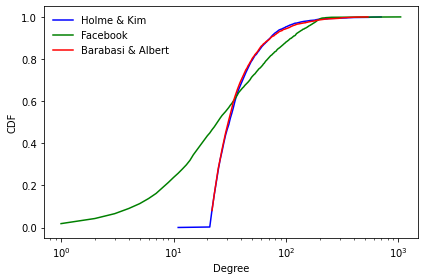

In [ ]:
Cdf.from_seq(degrees(test), name = 'Holme & Kim').plot(color = 'blue')
Cdf.from_seq(degrees(fb), name = 'Facebook').plot(color = 'green')
Cdf.from_seq(degrees(ba), name = 'Barabasi & Albert').plot(color = 'red')

decorate(xlabel='Degree', ylabel='CDF',
         xscale = 'log') #The CDF graph of both HK and BA model are almost identical. Comparing it to the given data, both models are only a good approximation at the end tail.

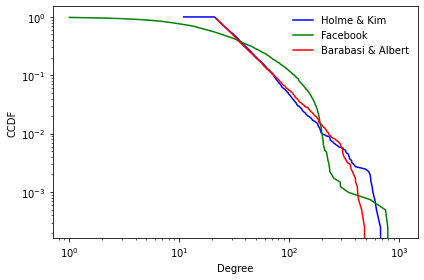

In [ ]:
(1-Cdf.from_seq(degrees(test), name = 'Holme & Kim')).plot(color = 'blue')
(1-Cdf.from_seq(degrees(fb), name = 'Facebook')).plot(color = 'green')
(1-Cdf.from_seq(degrees(ba), name = 'Barabasi & Albert')).plot(color = 'red')

decorate(xlabel='Degree', ylabel='CCDF',
         xscale = 'log', yscale = 'log') #Both models follow the same trend of the data. However, I am not very sure if I could say that both are good models for the tail behavior.